In [1]:
import pandas as pd
import numpy as np
import ffn
from datetime import datetime as dt
from datetime import timedelta
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import font_manager
from IPython.display import FileLink, FileLinks

# TODO: Configure Datafiles & Parameters

NOTE: You will need to update this every month!

* Change the datafile name to this month's datafile name [truecode-performance-yyyymmdd.csv]
* Change the FUND_END_DATE to the last date of the month

In [2]:
datafile = 'truecode-performance-20230331.csv'

In [3]:
FOA_START_DATE = dt.fromisoformat('2019-11-19')
FOA_END_DATE = dt.fromisoformat('2022-04-30')
FUND_START_DATE = dt.fromisoformat('2022-05-01')
FUND_END_DATE = dt.fromisoformat('2023-03-31')

# Font Configuration

If you receive an exception for Roboto Condensed or Roboto, stop here and fix the font configuration.

In [4]:
mpl.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

Fontconfig warning: line 146: blank doesn't take any effect anymore. please remove it from your fonts.conf


['/System/Library/Fonts/Supplemental/NotoSansMarchen-Regular.ttf',
 '/System/Library/Fonts/Supplemental/Mshtakan.ttc',
 '/Library/Fonts/Cotasia-Regular.ttf',
 '/System/Library/Fonts/Supplemental/BigCaslon.ttf',
 '/System/Library/Fonts/Supplemental/NotoSansSamaritan-Regular.ttf',
 '/Library/Fonts/HoboStd.otf',
 '/Library/Fonts/MinionPro-It.otf',
 '/System/Library/Fonts/Supplemental/NotoSansTagbanwa-Regular.ttf',
 '/System/Library/Fonts/Supplemental/Wingdings 3.ttf',
 '/Library/Fonts/JuliasDream-Regular.ttf',
 '/Library/Fonts/Microsoft/SimSun.ttf',
 '/System/Library/Fonts/Supplemental/NotoSansNewTaiLue-Regular.ttf',
 '/Users/jmp/Library/Fonts/Roboto-LightItalic.ttf',
 '/Library/Fonts/Microsoft/Bookshelf Symbol 7.ttf',
 '/System/Library/Fonts/Supplemental/NotoSansLepcha-Regular.ttf',
 '/System/Library/Fonts/Supplemental/Tamil MN.ttc',
 '/System/Library/Fonts/Supplemental/Impact.ttf',
 '/Library/Fonts/NuevaStd-CondItalic.otf',
 '/System/Library/Fonts/Supplemental/Krungthep.ttf',
 '/System/

In [5]:
font_manager.findfont('Roboto Condensed')
font_manager.findfont('Roboto')

'/Users/jmp/Library/Fonts/Roboto-Regular.ttf'

# Configure Charts

In [6]:
%matplotlib inline
pd.options.display.float_format = '{:,.4f}'.format
sns.set_style("whitegrid")

mpl.rcParams.update({
                     'text.color' : "white",
                     'lines.linewidth': 4,
                     'font.size': 16.0,
                     'legend.facecolor': "182742",
                     'legend.edgecolor': 'CFB023',
                     'legend.fancybox': True,
                     'legend.framealpha': 1.,
                     'legend.loc': 'right',
                     'xtick.color': 'white',
                     'ytick.color': 'white',
                     'ytick.minor.visible': True,
                     'axes.facecolor': '#182742',
                     'axes.edgecolor': 'white',
                     'axes.grid': False,
                     'axes.axisbelow': 'line',
                     'grid.alpha': 0.3,
#                      'axes.grid.axis': 'y',
#                      'axes.grid.which': 'minor',
                     'axes.labelcolor' : "white",
                     'axes.labelsize': "24",
                     'axes.labelweight': "bold",
                     'axes.titlesize': 28,
                     'axes.titleweight': 'bold',
                     'axes.titlepad': 20,
                     'figure.facecolor': '#182742',
#                      'xtick.bottom': False,
                     'figure.figsize': [16, 9],
                     'font.sans-serif': ['Roboto Condensed', 'Roboto', 'Tahoma', 'DejaVu Sans', 'Lucida Grande', 'Verdana'],
                     'font.family': "sans-serif",
                    }
                   )
mpl.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'white',
          'axes.facecolor': '#182742',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
          'axes.grid.which

In [7]:
prices = pd.read_csv(datafile)
prices.Date = pd.to_datetime(prices.Date)
prices.index = prices.Date

In [8]:
prices[['Strategy', 'Bitcoin']]

,Strategy,Bitcoin
Date,,
2019-12-19,"10,000.0000","10,000.0000"
2019-12-20,"10,036.1900","10,052.4900"
2019-12-21,"9,981.8100","9,975.4600"
2019-12-22,"10,342.4300","10,491.0800"
2019-12-23,"10,163.9500","10,233.2600"
...,...,...
2023-03-27,"55,511.0500","38,507.5000"
2023-03-28,"56,438.6400","38,700.8000"
2023-03-29,"58,349.3700","40,244.7000"


# Fund Statistics

In [9]:
sample = prices[FUND_START_DATE:FUND_END_DATE]
stats = sample[['Strategy', 'Bitcoin']].calc_stats()
stats.display()

Stat                 Strategy    Bitcoin
-------------------  ----------  ----------
Start                2022-05-01  2022-05-01
End                  2023-03-31  2023-03-31
Risk-free rate       0.00%       0.00%

Total Return         19.41%      -23.22%
Daily Sharpe         0.58        -0.12
Daily Sortino        0.96        -0.19
CAGR                 21.40%      -25.09%
Max Drawdown         -32.35%     -59.64%
Calmar Ratio         0.66        -0.42

MTD                  9.88%       23.01%
3m                   42.65%      72.08%
6m                   17.39%      46.56%
YTD                  42.65%      72.08%
1Y                   -           -
3Y (ann.)            -           -
5Y (ann.)            -           -
10Y (ann.)           -           -
Since Incep. (ann.)  21.40%      -25.09%

Daily Sharpe         0.58        -0.12
Daily Sortino        0.96        -0.19
Daily Mean (ann.)    18.50%      -6.26%
Daily Vol (ann.)     32.14%      52.02%
Daily Skew           0.57        -0.42
Daily K

/Users/jmp/code/truecode_metrics/graph-returns-fund.pdf

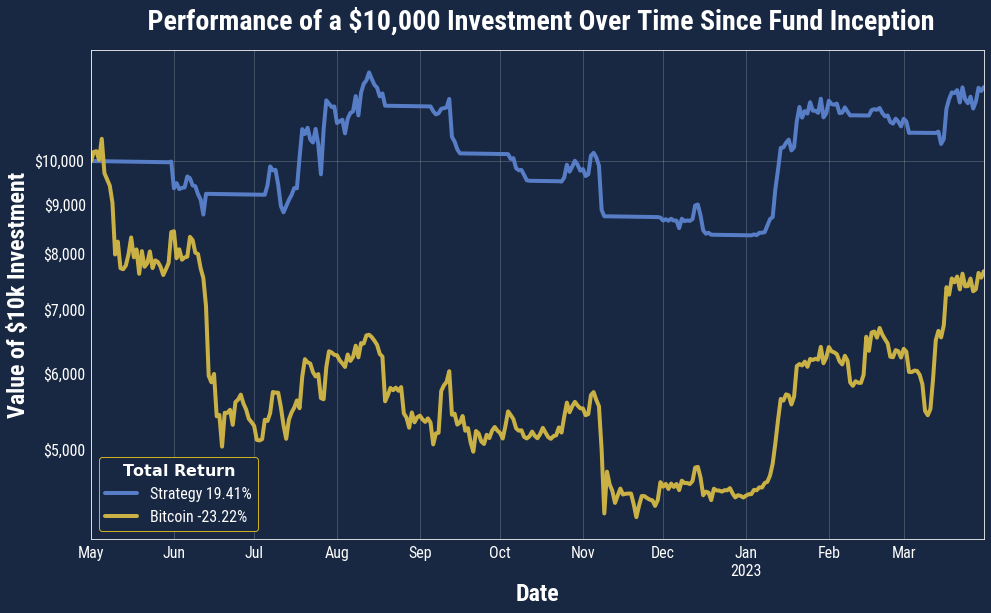

In [10]:
ax = sample[['Strategy', 'Bitcoin']].rebase(value=10000).plot.line(title=' Performance of a $10,000 Investment Over Time Since Fund Inception', logy=True, color={'Strategy': '#567DC5', 'Bitcoin': '#CAB145'}, xlabel="Date", ylabel="Value of $10k Investment")
sample_stats = sample[['Strategy', 'Bitcoin']].calc_stats()
strategy_total_return = sample_stats['Strategy'].stats['total_return']
bitcoin_total_return = sample_stats['Bitcoin'].stats['total_return']
ax.legend(('Strategy {:.2f}%'.format(strategy_total_return * 100.), 'Bitcoin {:.2f}%'.format(bitcoin_total_return * 100.)), loc='lower left', title=r'$\bf{Total\ Return}$')

ax.yaxis.set_major_formatter(lambda x, pos: f"${int(x):,.0f}")
ax.yaxis.set_minor_formatter(lambda x, pos: f"${int(x):,.0f}")
ax.yaxis.set_major_locator(mpl.ticker.LogLocator())
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(True)

ax.get_figure().savefig('graph-returns-fund.pdf', format='pdf')
display(FileLink('graph-returns-fund.pdf'))

# Full History

In [11]:
stats = prices[['Strategy', 'Bitcoin']].calc_stats()
stats.display()

Stat                 Strategy    Bitcoin
-------------------  ----------  ----------
Start                2019-12-19  2019-12-19
End                  2023-03-31  2023-03-31
Risk-free rate       0.00%       0.00%

Total Return         484.43%     304.10%
Daily Sharpe         1.23        0.80
Daily Sortino        2.11        1.28
CAGR                 71.30%      53.08%
Max Drawdown         -32.35%     -76.28%
Calmar Ratio         2.20        0.70

MTD                  9.88%       23.01%
3m                   42.65%      72.08%
6m                   17.39%      46.56%
YTD                  42.65%      72.08%
1Y                   16.76%      -36.51%
3Y (ann.)            86.22%      65.24%
5Y (ann.)            71.30%      53.08%
10Y (ann.)           -           -
Since Incep. (ann.)  71.30%      53.08%

Daily Sharpe         1.23        0.80
Daily Sortino        2.11        1.28
Daily Mean (ann.)    43.27%      48.08%
Daily Vol (ann.)     35.09%      60.24%
Daily Skew           0.50        -0.7

/Users/jmp/code/truecode_metrics/graph-returns-all.pdf

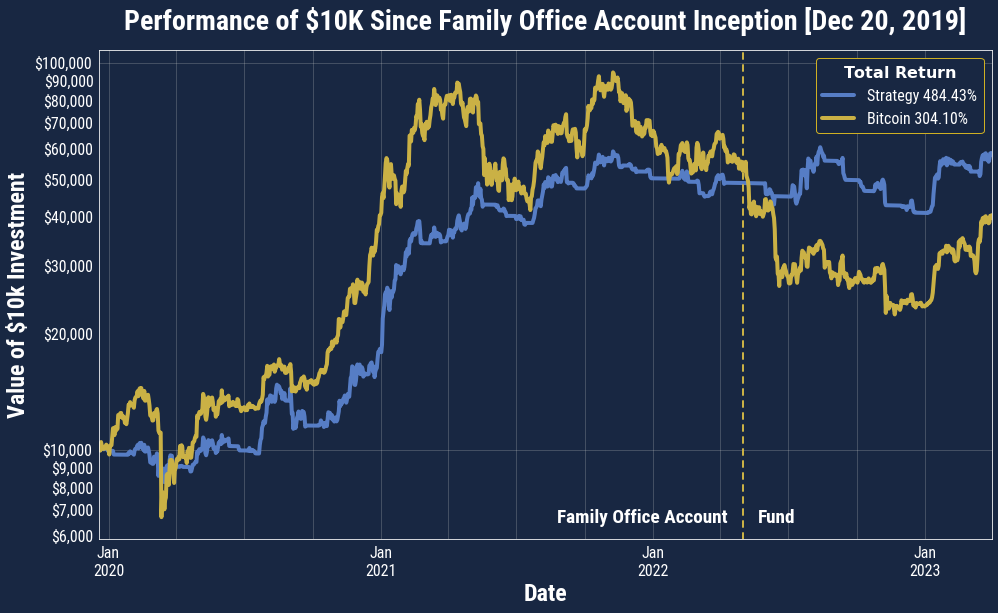

In [12]:
ax = prices[['Strategy', 'Bitcoin']].plot.line(title='Performance of $10K Since Family Office Account Inception [Dec 20, 2019]', logy=True, color={'Strategy': '#567DC5', 'Bitcoin': '#CAB145'}, xlabel="Date", ylabel="Value of $10k Investment")
strategy_total_return = stats['Strategy'].stats['total_return']
bitcoin_total_return = stats['Bitcoin'].stats['total_return']
ax.legend(('Strategy {:.2f}%'.format(strategy_total_return * 100.), 'Bitcoin {:.2f}%'.format(bitcoin_total_return * 100.)), loc='upper right', title=r'$\bf{Total\ Return}$')
ax.yaxis.set_major_formatter(lambda x, pos: f"${int(x):,.0f}")
ax.yaxis.set_minor_formatter(lambda x, pos: f"${int(x):,.0f}")
ax.axvline(dt(2022, 5, 1), color='#CAB145', label="Fund", dashes=(3, 3), dash_capstyle="round", linewidth=2)
ax.text(dt(2022, 5, 1) + timedelta(days=20), 6500,'Fund', rotation=0, color='#fff', fontweight='bold', fontsize='large')
ax.text(dt(2022, 5, 1) - timedelta(days=20), 6500,'Family Office Account', rotation=0, color='#fff', fontweight='bold', fontsize='large', horizontalalignment='right')
ax.yaxis.set_major_locator(mpl.ticker.LogLocator())
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1, 13, 3)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(True)

ax.get_figure().savefig('graph-returns-all.pdf', format='pdf')
display(FileLink('graph-returns-all.pdf'))


Stat                 Strategy    Bitcoin
-------------------  ----------  ----------
Start                2022-01-01  2022-01-01
End                  2022-12-31  2022-12-31
Risk-free rate       0.00%       0.00%

Total Return         -18.57%     -64.81%
Daily Sharpe         -0.37       -1.10
Daily Sortino        -0.55       -1.65
CAGR                 -18.62%     -64.94%
Max Drawdown         -32.33%     -66.43%
Calmar Ratio         -0.58       -0.98

MTD                  -4.13%      -3.62%
3m                   -17.71%     -14.83%
6m                   -9.29%      -16.55%
YTD                  -18.57%     -64.81%
1Y                   -           -
3Y (ann.)            -           -
5Y (ann.)            -           -
10Y (ann.)           -           -
Since Incep. (ann.)  -18.62%     -64.94%

Daily Sharpe         -0.37       -1.10
Daily Sortino        -0.55       -1.65
Daily Mean (ann.)    -10.34%     -58.06%
Daily Vol (ann.)     27.90%      52.95%
Daily Skew           0.26        -0.28
Dai

/Users/jmp/code/truecode_metrics/graph-returns-2022-bear-market.pdf

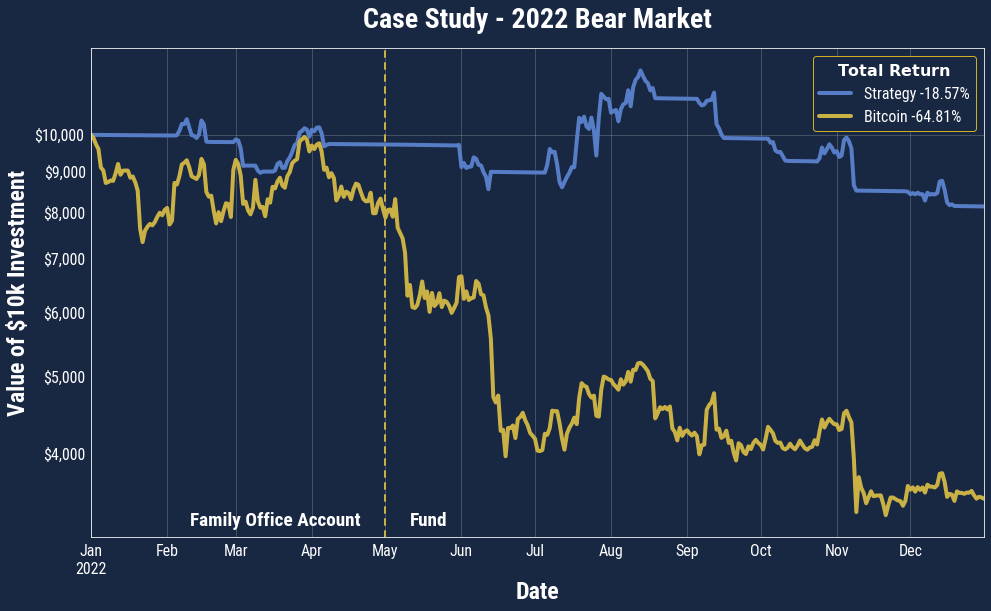

In [13]:
sample = prices[dt.fromisoformat('2022-01-01'):dt.fromisoformat('2022-12-31')]
rebased_sample = ffn.rebase(sample[['Strategy', 'Bitcoin']], value=10000)
ax = rebased_sample[['Strategy', 'Bitcoin']].plot.line(title='Case Study - 2022 Bear Market', logy=True, color={'Strategy': '#567DC5', 'Bitcoin': '#CAB145'}, xlabel="Date", ylabel="Value of $10k Investment")
rebased_sample_stats = rebased_sample[['Strategy', 'Bitcoin']].calc_stats()
rebased_sample_stats.display()
strategy_total_return = rebased_sample_stats['Strategy'].stats['total_return']
bitcoin_total_return = rebased_sample_stats['Bitcoin'].stats['total_return']
ax.legend(('Strategy {:.2f}%'.format(strategy_total_return * 100.), 'Bitcoin {:.2f}%'.format(bitcoin_total_return * 100.)), loc='upper right', title=r'$\bf{Total\ Return}$')

ax.yaxis.set_major_formatter(lambda x, pos: f"${int(x):,.0f}")
ax.yaxis.set_minor_formatter(lambda x, pos: f"${int(x):,.0f}")
ax.axvline(dt(2022, 5, 1), color='#CAB145', label="Fund", dashes=(3, 3), dash_capstyle="round", linewidth=2)
ax.text(dt(2022, 5, 1) + timedelta(days=10), 3250,'Fund', rotation=0, color='#fff', fontweight='bold', fontsize='large')
ax.text(dt(2022, 5, 1) - timedelta(days=10), 3250,'Family Office Account', rotation=0, color='#fff', fontweight='bold', fontsize='large', horizontalalignment='right')
ax.yaxis.set_major_locator(mpl.ticker.LogLocator())
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13, 1)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(True)

ax.get_figure().savefig('graph-returns-2022-bear-market.pdf', format='pdf')
display(FileLink('graph-returns-2022-bear-market.pdf'))


/Users/jmp/code/truecode_metrics/drawdowns.pdf

/Users/jmp/code/truecode_metrics/drawdowns.csv

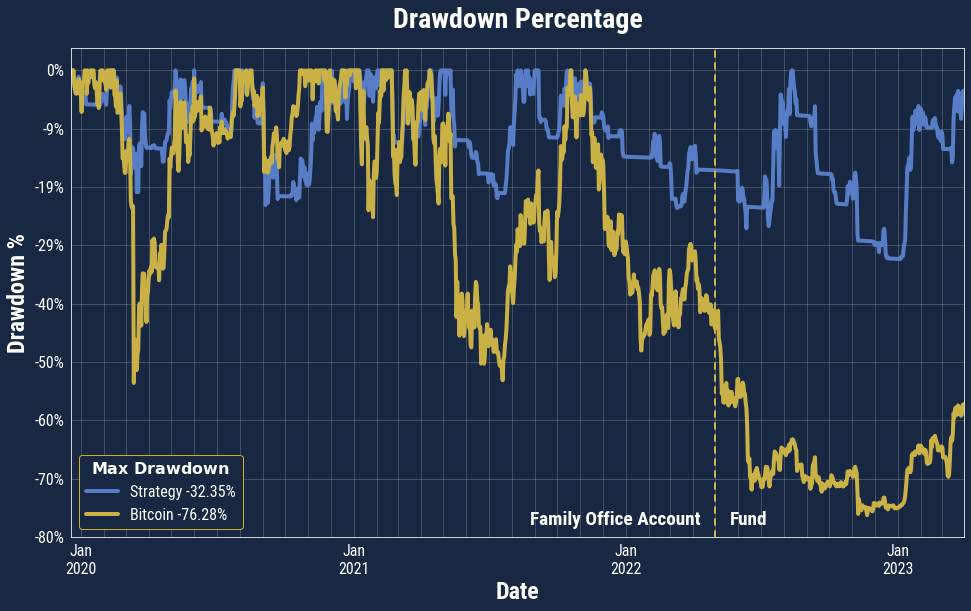

In [14]:
rebased_sample = ffn.rebase(prices[['Strategy', 'Bitcoin']], value=10000)
drawdowns = rebased_sample.to_drawdown_series()
ax = drawdowns.plot(ylabel='Drawdown %', title='Drawdown Percentage', color={'Strategy': '#567DC5', 'Bitcoin': '#CAB145'})
rebased_drawdown_stats = rebased_sample[['Strategy', 'Bitcoin']].calc_stats()
# rebased_drawdown_stats.display()
strategy_max_drawdown = rebased_drawdown_stats['Strategy'].stats['max_drawdown']
bitcoin_max_drawdown = rebased_drawdown_stats['Bitcoin'].stats['max_drawdown']
ax.legend(('Strategy {:.2f}%'.format(strategy_max_drawdown * 100.), 'Bitcoin {:.2f}%'.format(bitcoin_max_drawdown * 100.)), loc='lower left', title=r'$\bf{Max\ Drawdown}$')

ax.axvline(dt(2022, 5, 1), color='#CAB145', label="Fund", dashes=(3, 3), dash_capstyle="round", linewidth=2)
ax.text(dt(2022, 5, 1) + timedelta(days=20), -.78,'Fund', rotation=0, color='#fff', fontweight='bold', fontsize='large')
ax.text(dt(2022, 5, 1) - timedelta(days=20), -.78,'Family Office Account', rotation=0, color='#fff', fontweight='bold', fontsize='large', horizontalalignment='right')
fig = ax.get_figure()
ax.yaxis.set_major_formatter(lambda x, pos: f"{int(x * 100)}%")

ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1,13)))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(True)

fig.savefig('drawdowns.pdf')
display(FileLink('drawdowns.pdf'))

drawdowns.to_csv('drawdowns.csv')
display(FileLink('drawdowns.csv'))



In [15]:
# strategy_monthly_returns = prices.groupby([prices.Date.dt.year, prices.Date.dt.month])['Strategy'].apply(pd.DataFrame.pct_change, freq='M')
strategy_monthly_returns = prices['Strategy'].pct_change(freq='M')

strategy_monthly_returns.to_csv("strategy_monthly_returns.csv")
strategy_monthly_returns

Date
2019-12-19      NaN
2019-12-20      NaN
2019-12-21      NaN
2019-12-22      NaN
2019-12-23      NaN
              ...  
2023-03-27      NaN
2023-03-28      NaN
2023-03-29      NaN
2023-03-30      NaN
2023-03-31   0.0988
Name: Strategy, Length: 1199, dtype: float64

# Calculate Correlation

In [16]:
corr = prices[['Strategy', 'Bitcoin']].corr()
corr

,Strategy,Bitcoin
Strategy,1.0000,0.6563
Bitcoin,0.6563,1.0000


In [17]:
strategy_corr = corr[['Strategy']].loc['Bitcoin'].iloc[0]
print("Strategy Correlation = {:.4}".format(strategy_corr))

Strategy Correlation = 0.6563


# Calculate Volatility & Beta

In [18]:
strategy_vol = stats['Strategy'].stats['yearly_vol']
benchmark_vol = stats['Bitcoin'].stats['yearly_vol']
print("Strategy Volatility = {:.4}".format(strategy_vol))
print("Bitcoin Volatility = {:.4}".format(benchmark_vol))

Strategy Volatility = 0.8309
Bitcoin Volatility = 1.525


# Calculate Beta

In [19]:
beta = strategy_corr * (strategy_vol / benchmark_vol)
print("Strategy Beta = {:.4}".format(beta))

Strategy Beta = 0.3576
